tgb - 7/10/2019 - Ultimate goal is to make movies with WMI/Potential/Self-aggregation  
Three steps:  
1) Load data and make movies of PW in dam  
2) Study MSE budget and construct potential  
3) Make movie of potential and how it evolves in time

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime
from ccam import *
from skimage import measure
from scipy import ndimage

# 1) Plot PW field and construct potential

In [2]:
# DAM
# beg = '/scratch/b/b380882/'
# model = 'dam/'
# small = 'RCE_small'
# large = 'RCE_large'
# dim = '2D/'

In [3]:
# ICON_LEM
# beg = '/scratch/b/b380882/'
# model = 'ICON_LEM_CRM/'
# small = 'RCE_small_'
# large = 'RCE_large_'
# dim = '2D/'

In [4]:
# SAM
beg = '/scratch/b/b380882/'
model = 'SAM_CRM/'
small = 'RCE_small'
large = 'RCE_large'
dim = '2D/'

In [5]:
# DAM
# PW300 = xr.open_mfdataset(beg+model+large+'300/'+dim+'*prw.nc')
# PW295 = xr.open_mfdataset(beg+model+large+'295/'+dim+'*prw.nc')
# PW305 = xr.open_mfdataset(beg+model+large+'305/'+dim+'*prw.nc')

# PWs300 = xr.open_mfdataset(beg+model+small+'300/'+dim+'*prw.nc')
# PWs295 = xr.open_mfdataset(beg+model+small+'295/'+dim+'*prw.nc')
# PWs305 = xr.open_mfdataset(beg+model+small+'305/'+dim+'*prw.nc')

In [6]:
# ICON_LEM
# PW300 = xr.open_mfdataset(beg+model+large+'300/'+dim+'ICON_LEM_CRM-'+large+'300'+'-'+dim[:-1]+'.nc')
# PW295 = xr.open_mfdataset(beg+model+large+'295/'+dim+'ICON_LEM_CRM-'+large+'295'+'-'+dim[:-1]+'.nc')
# PW305 = xr.open_mfdataset(beg+model+large+'305/'+dim+'ICON_LEM_CRM-'+large+'305'+'-'+dim[:-1]+'.nc')

# PWs300 = xr.open_mfdataset(beg+model+small+'300/'+dim+'ICON_LEM_CRM-'+small+'300'+'-'+dim[:-1]+'.nc')
# PWs295 = xr.open_mfdataset(beg+model+small+'295/'+dim+'ICON_LEM_CRM-'+small+'295'+'-'+dim[:-1]+'.nc')
# PWs305 = xr.open_mfdataset(beg+model+small+'305/'+dim+'ICON_LEM_CRM-'+small+'305'+'-'+dim[:-1]+'.nc')

In [7]:
# SAM
PW300 = xr.open_mfdataset(beg+model+large+'300/'+dim+'SAM_CRM_'+large+'300'+'_'+dim[:-1]+'_*prw.nc')
PW295 = xr.open_mfdataset(beg+model+large+'295/'+dim+'SAM_CRM_'+large+'295'+'_'+dim[:-1]+'_*prw.nc')
PW305 = xr.open_mfdataset(beg+model+large+'305/'+dim+'SAM_CRM_'+large+'305'+'_'+dim[:-1]+'_*prw.nc')

PWs300 = xr.open_mfdataset(beg+model+small+'300/'+dim+'SAM_CRM_'+small+'300'+'_'+dim[:-1]+'_*prw.nc')
PWs295 = xr.open_mfdataset(beg+model+small+'295/'+dim+'SAM_CRM_'+small+'295'+'_'+dim[:-1]+'_*prw.nc')
PWs305 = xr.open_mfdataset(beg+model+small+'305/'+dim+'SAM_CRM_'+small+'305'+'_'+dim[:-1]+'_*prw.nc')

/pf/b/b380882/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/pf/b/b380882/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.14 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset), with a nested list structure such that you can combine
along the dimensions None. Alternatively if 

# 2) Time-evolution of PW and WMI

In [8]:
PW300=PW300

In [9]:
PW300

<xarray.Dataset>
Dimensions:  (time: 2400, x: 2048, y: 128)
Coordinates:
  * time     (time) float32 0.04167 0.08333 0.125 ... 99.91666 99.95834 100.0
  * x        (x) float32 0.0 3000.0 6000.0 ... 6135000.0 6138000.0 6141000.0
  * y        (y) float32 0.0 3000.0 6000.0 9000.0 ... 375000.0 378000.0 381000.0
Data variables:
    prw      (time, y, x) float32 dask.array<shape=(2400, 128, 2048), chunksize=(2400, 128, 2048)>
    sprw     (time, y, x) float32 dask.array<shape=(2400, 128, 2048), chunksize=(2400, 128, 2048)>
Attributes:
    history:                    Tue Jan  8 10:49:43 2019: ncks -v prw SAM_CRM...
    NCO:                        "4.6.3"
    history_of_appended_files:  Fri Jan  4 21:19:59 2019: Appended file rcemi...
    nco_openmp_thread_number:   1

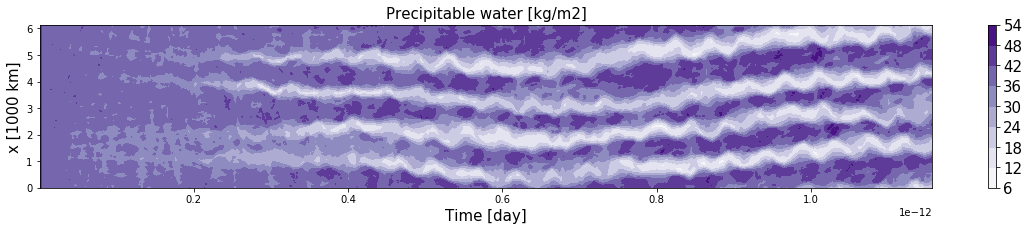

In [10]:
fz = 15

plt.figure(figsize=(20,3))

plt.contourf(PW300.time/(1e9*24*3600),PW300.x/1e6,PW300.prw.mean(dim='y').values.T,cmap='Purples')
plt.xlabel('Time [day]',fontsize=fz)
plt.ylabel('x [1000 km]',fontsize=fz)
plt.title('Precipitable water [kg/m2]',fontsize=fz)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=fz)

In [11]:
def find_separation_bin(field,vmin=45,vmax=55,bins=100):
# Inputs
# field = field from which to take the pdf
# vmin = minimal value of the interval over which min(PDF) will be searched
# vmax = maximal value //
# bins = Number of bins of the PDF

    field_hist,bin_edges = np.histogram(field.flatten(),bins=bins)
    bin_mid = 0.5*(bin_edges[:-1]+bin_edges[1:])

    binary = (bin_mid<vmax)*(bin_mid>vmin)
    imin =  np.argmin(field_hist[binary])+np.argmax(binary)

    return bin_mid[imin],bin_mid

In [12]:
def find_sepmax_bin(field,vmin=45,vmax=55,bins=100):
# Inputs
# field = field from which to take the pdf
# vmin = minimal value of the interval over which min(PDF) will be searched
# vmax = maximal value //
# bins = Number of bins of the PDF

    field_hist,bin_edges = np.histogram(field.flatten(),bins=bins)
    bin_mid = 0.5*(bin_edges[:-1]+bin_edges[1:])

    binary = (bin_mid<vmax)*(bin_mid>vmin)
    imin =  np.argmax(field_hist[binary])+np.argmax(binary)

    return bin_mid[imin],bin_mid

In [13]:
a,bin_m = find_sepmax_bin(PW300.prw[24:240,:,:].values,vmin=17,vmax=32,bins=100)

In [14]:
a

31.8134

In [15]:
field_hist,bin_edges = np.histogram(PW300.prw[2000:2400,:,:].values.flatten(),bins=100)
bin_mid = 0.5*(bin_edges[:-1]+bin_edges[1:])

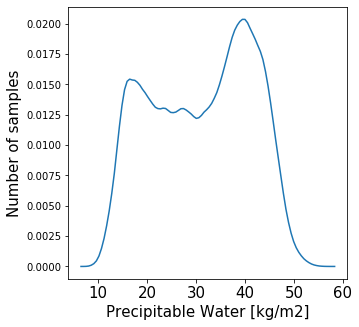

In [16]:
fz = 15

plt.figure(figsize=(5,5))

ax = plt.subplot(111)
ax.plot(bin_mid,field_hist/np.sum(field_hist))
#ax.axvline(x=a,color='k',linestyle='--')
plt.xlabel('Precipitable Water [kg/m2]',fontsize=fz)
plt.ylabel('Number of samples',fontsize=fz)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fz) 

In [17]:
a

31.8134

In [18]:
dx = (PW300.x[1]-PW300.x[0]).values
print(dx)

3000.0


In [24]:
PW300.prw[::24,:,:].shape

(100, 128, 2048)

In [25]:
WMI = calc_WMI(PW300.prw[2000:2001,:,:],dx,CRH_sep=a,slices=1,circle=False)

2048


In [26]:
WMI_LC = calc_WMI(PW300.prw[::24,:,:],dx,CRH_sep=a,slices=1,circle=False)

204899


In [27]:
np.argmax(WMI_LC[1:])+1
WMI_LC[43]=0.5*(WMI_LC[42]+WMI_LC[44])

In [28]:
Iorg = np.zeros((100,1))
for it in range(100):
    Iorg[it] = calc_Iorg_complete(PW300.prw[24*it,:,:], thresholds=(a,1e3))

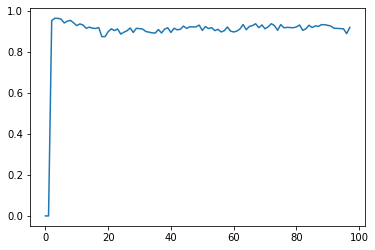

In [29]:
plt.plot(Iorg[2:])

Text(0.5, 0, 'Time [day]')

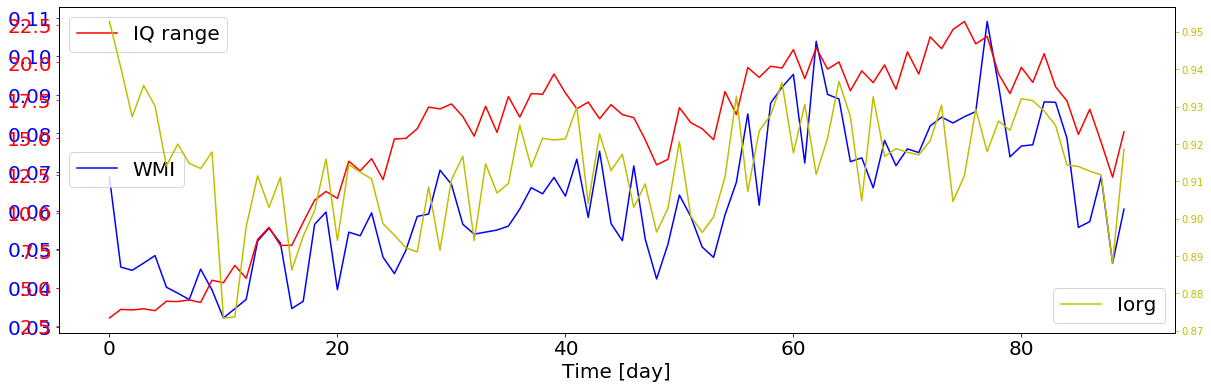

In [30]:
fz = 20

f = plt.figure(figsize=(20,6))

ax1 = plt.subplot(111)
ax1.plot(WMI_LC[10:],color='b',label='WMI')
ax1.yaxis.label.set_color('b')
ax1.tick_params(axis='y',colors='b')
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(fz)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(fz)
plt.legend(fontsize=fz,loc='center left')

ax2 = plt.twinx()
ax2.plot(IQ[10:],color='r',label='IQ range')
ax2.yaxis.label.set_color('r')
ax2.tick_params(axis='y',colors='r')
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(fz)
plt.legend(fontsize=fz,loc='upper left')

ax3 = plt.twinx()
ax3.plot(Iorg[10:],color='y',label='Iorg')
ax3.yaxis.label.set_color('y')
ax3.tick_params(axis='y',colors='y')
for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(fz)
plt.legend(fontsize=fz,loc='lower right')

ax1.set_xlabel('Time [day]',fontsize=fz)

In [21]:
Q1 = np.quantile(PW300.prw[::24,:,:],0.25,axis=(1,2))
Q3 = np.quantile(PW300.prw[::24,:,:],0.75,axis=(1,2))

In [22]:
IQ = Q3-Q1

In [ ]:
plt.figure(figsize=(15,5))

plt.contourf(PW300.time/(1e9*24*3600),PW300.x/1e6,binary.mean(dim='y').values.T,cmap='Purples')
plt.xlabel('Time [day]',fontsize=fz)
plt.ylabel('x [1000 km]',fontsize=fz)
plt.title('Precipitable water [kg/m2]',fontsize=fz)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=fz)

In [23]:
def calc_WMI(CRH,dx,CRH_sep=None, slices=1, circle=False):
    ### Input: precipitable water field (time, x, y)
    ### dx = Average grid spacing
    ### CRH_sep = Value separating moist and dry regions
    ### Returns: aggregation index calculated as 4*area*pi/(perimeter length)**2
    ###          which compares the length of the boundary between the moist and 
    ###          the dry region with the circumference of the moist region
    ###
    ### Option: slices, slice longitude into s slices and compute averge WMI over subregions
    
    assert slices > 0, 'slices needs to be at least 1'
    
    if CRH_sep==None: CRH_median = np.median(CRH, axis=(1,2))
    else: CRH_sep = np.expand_dims(CRH_sep,axis=0)
    tmp = np.repeat(CRH_sep[:, np.newaxis], CRH.shape[1], axis=1)
    CRH_median_rep = np.repeat(tmp[:,:,np.newaxis],CRH.shape[2],axis=2)
    
    binary = CRH>CRH_median_rep
    binary = binary.values #Convert to numpy array

    #split region into n slices, assume that longitude is last dimension
    #Todo, change axis to whatever longitude is
    binary=np.array_split(binary, slices, axis=2)
    binary=np.asarray(binary)
    
    A_tot = np.sum(binary,axis=(2,3))*(dx**2)/1e12
    perimeter_tot = np.zeros(CRH.shape[0])
    

#    for it in range(len(np.median(CRH,axis=(1,2)))):
    for it in range(len(np.median(CRH,axis=(1,2)))):
        print('it=',it,end="\r")
        for s in range(slices): 
            #print("calculating time step %i"%it)

            binary_boundary=np.copy(binary[s,it,:,:])
            binary_boundary[1:-1,:]=0
            perimeter_tot[it] = dx*(measure.perimeter(binary[s,it,:,:],8) - np.sum(binary_boundary))*1e3

    print(np.shape(CRH)[2])
    if circle == True:
        WMI = np.mean(4*np.pi*A_tot/perimeter_tot**2, axis=0)
    else:
        #Compare contour to the width of the domain
        WMI = 2*np.shape(CRH)[1]*dx*1e3/perimeter_tot #Compare to the width of the domain
        #WMI = perimeter_tot

    return WMI

In [ ]:
fz = 25
it = 1500
vmin = 0
vmax = 1

(f,sub) = plt.subplots(3,2,gridspec_kw={'width_ratios':[1,15],'wspace':0.05,'hspace':0.05})
f.set_size_inches((20,3))

for i in range(3):
    for j in range(2):
    
        if i==0 and j==0: CRH = PWs295.prw/PWs295.sprw;
        elif i==0 and j==1: CRH = PW295.prw/PW295.sprw;
        elif i==1 and j==0: CRH = PWs300.prw/PWs300.sprw;
        elif i==1 and j==1: CRH = PW300.prw/PW300.sprw;
        elif i==2 and j==0: CRH = PWs305.prw/PWs305.sprw;
        elif i==2 and j==1: CRH = PW305.prw/PW305.sprw;

        MAPPABLE = sub[i][j].imshow(CRH.values[it,:,:],\
                         vmin=vmin,vmax=vmax,cmap='Purples')
        sub[i][j].get_xaxis().set_ticks([])
        sub[i][j].get_yaxis().set_ticks([])
        
        if i==2 and j==1:
            cbar = plt.colorbar(MAPPABLE,orientation='horizontal')
            cbar.set_label('Column Relative Humidity', rotation=0, fontsize=fz/2)
        
        plt.subplots_adjust(wspace=0.05, hspace=0.05)
        
        if j==1: 
            if i==0: STR = '295K'
            elif i==1: STR = '300K'
            elif i==2: STR = '305K'
            plt.text(-0.041, 0.5,STR,horizontalalignment='center',
                     verticalalignment='center',
                     transform=sub[i][j].transAxes,
                     fontsize = fz)
            if i==0:
                plt.text(0.5,1.2,\
                         'Time = '+str(PW300.time[it].values/(1e9*24*3600))[:-11]+'days',\
                         horizontalalignment='center',
                         verticalalignment='center',
                         transform=sub[i][j].transAxes,
                         fontsize = fz)
                


# plt.savefig('JPG_DATA/it'+str(PW300.time[it].values/(1e9*24*3600))[:-11])
# # # Now adding the colorbar
# # cbar=plt.colorbar(extend="max",location='bottom')

# 3) Potential

## 3.1) Check evaporation, precipitation

In [11]:
V300 = xr.open_mfdataset(beg+model+large+'300/'+dim+'SAM_CRM_'+large+'300'+'_'+dim[:-1]+'_*.nc')

/pf/b/b380882/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/pf/b/b380882/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.14 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset), with a nested list structure such that you can combine
along the dimensions None. Alternatively if 

In [12]:
V300

<xarray.Dataset>
Dimensions:    (time: 2400, x: 2048, y: 128)
Coordinates:
  * time       (time) float32 0.04167 0.08333 0.125 ... 99.91666 99.95834 100.0
  * x          (x) float32 0.0 3000.0 6000.0 ... 6135000.0 6138000.0 6141000.0
  * y          (y) float32 0.0 3000.0 6000.0 ... 375000.0 378000.0 381000.0
Data variables:
    advfmse    (time, y, x) float32 dask.array<shape=(2400, 128, 2048), chunksize=(2400, 128, 2048)>
    clivi      (time, y, x) float32 dask.array<shape=(2400, 128, 2048), chunksize=(2400, 128, 2048)>
    clwvi      (time, y, x) float32 dask.array<shape=(2400, 128, 2048), chunksize=(2400, 128, 2048)>
    evspsbl    (time, y, x) float64 dask.array<shape=(2400, 128, 2048), chunksize=(2400, 128, 2048)>
    fmse       (time, y, x) float32 dask.array<shape=(2400, 128, 2048), chunksize=(2400, 128, 2048)>
    hadvfmse   (time, y, x) float32 dask.array<shape=(2400, 128, 2048), chunksize=(2400, 128, 2048)>
    hfls       (time, y, x) float32 dask.array<shape=(2400, 128, 204

In [13]:
L_V = 2.5104e6; # Latent heat of vaporization in J/kg in SAM
EVAP = V300.hfls/L_V; # Latent heat flux in W/m2 to evap in kg/m2/s
V300.pr # Surface precipitation rate in kg/m2/s

<xarray.DataArray 'pr' (time: 2400, y: 128, x: 2048)>
dask.array<shape=(2400, 128, 2048), dtype=float32, chunksize=(2400, 128, 2048)>
Coordinates:
  * time     (time) float32 0.04167 0.08333 0.125 ... 99.91666 99.95834 100.0
  * x        (x) float32 0.0 3000.0 6000.0 ... 6135000.0 6138000.0 6141000.0
  * y        (y) float32 0.0 3000.0 6000.0 9000.0 ... 375000.0 378000.0 381000.0
Attributes:
    long_name:  Surface Precip. Rate
    units:      kg/m^2/s

In [14]:
V300.time

<xarray.DataArray 'time' (time: 2400)>
array([4.167000e-02, 8.333000e-02, 1.250000e-01, ..., 9.991666e+01,
       9.995834e+01, 1.000000e+02], dtype=float32)
Coordinates:
  * time     (time) float32 0.04167 0.08333 0.125 ... 99.91666 99.95834 100.0
Attributes:
    units:      day
    long_name:  time

In [15]:
dt = 3600 # 1 hour = 3600s
TENDENCY = {}
t_range = np.arange(0,np.size(V300.time)-1)
TENDENCY = (V300.prw[t_range+1,:,:].values-V300.prw[t_range,:,:].values)/dt

In [16]:
TENDENCY.shape

(2399, 128, 2048)

In [17]:
smol = (V300.prw[100,:,:]-V300.prw[99,:,:])/dt
print(smol.mean(dim=('x','y')).values)
print(TENDENCY[99,:,:].mean(axis=(0,1)))

-7.5746443e-06
-7.5746443e-06


In [18]:
TENDENCY.shape

(2399, 128, 2048)

In [19]:
(0.5*(V300.time[1:]+V300.time[:-1])).shape

(2398,)

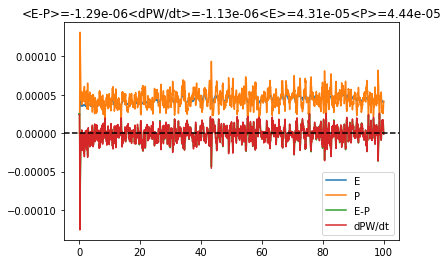

In [20]:
E_P = EVAP-V300.pr;
# Check that E balances P in time
ax = plt.subplot(111)
ax.plot(V300.time,EVAP.mean(dim=('x','y')),label='E')
ax.plot(V300.time,V300.pr.mean(dim=('x','y')),label='P')
ax.plot(V300.time,E_P.mean(dim=('x','y')),label='E-P')
ax.plot(V300.time[1:],TENDENCY.mean(axis=(1,2)),label='dPW/dt')
ax.axhline(y=0,color='k',linestyle='--')
plt.title('<E-P>='+'%.2e'%(E_P.mean(dim=('x','y','time')))+\
         '<dPW/dt>='+'%.2e'%(TENDENCY.mean(axis=(0,1,2)))+\
         '<E>='+'%.2e'%(EVAP.mean(dim=('x','y','time')))+\
         '<P>='+'%.2e'%(V300.pr.mean(dim=('x','y','time'))))
plt.legend()

## 3.2) Construct the potential by binning (E-P) based on Expectation[(E-P)|PW]

In [21]:
iT = np.arange(2000,2400,24)
T = V300.time[iT]

In [22]:
field_hist,bin_edges = np.histogram(PW300.prw[iT,:,:].values.flatten(),bins=100)
bin_mid = 0.5*(bin_edges[:-1]+bin_edges[1:])

In [23]:
field_hist

array([   55,   225,   760,  1823,  3703,  6557, 10380, 14978, 21075,
       28478, 36556, 44092, 52155, 60716, 67330, 69587, 69654, 69218,
       69303, 67290, 64672, 61434, 58920, 57627, 56197, 54158, 54200,
       53821, 55477, 54485, 54290, 54052, 53474, 52629, 51932, 52282,
       52395, 52593, 52216, 52263, 53315, 53836, 52331, 50917, 50149,
       50718, 52424, 53952, 54422, 55048, 55767, 57752, 59690, 62022,
       63903, 66931, 70829, 73395, 75244, 78453, 80638, 81973, 82643,
       82400, 82301, 80297, 79326, 78624, 77953, 76895, 74850, 71843,
       68272, 65303, 59238, 54022, 48549, 43953, 38893, 33013, 26478,
       20329, 15510, 11912,  9006,  7017,  5554,  4388,  3222,  2605,
        1896,  1329,   853,   536,   347,   187,    97,    31,    11,
           4])

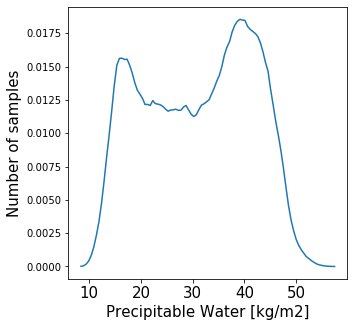

In [24]:
fz = 15

plt.figure(figsize=(5,5))

ax = plt.subplot(111)
ax.plot(bin_mid,field_hist/np.sum(field_hist))
#ax.axvline(x=a,color='k',linestyle='--')
plt.xlabel('Precipitable Water [kg/m2]',fontsize=fz)
plt.ylabel('Number of samples',fontsize=fz)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fz) 

In [25]:
bin_edges.shape

(101,)

In [26]:
# From https://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-np
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- np ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

In [28]:
#Nbin = 10
Nbin = np.size(bin_edges)
PWmin = 10
PWmax = 50

E_Pm = np.zeros((Nbin-1,1))
E_Pstd = np.copy(E_Pm)
PWm = np.copy(E_Pstd)
PWstd = np.copy(E_Pstd)



#for ibin,edge in enumerate(np.linspace(PWmin,PWmax,num=Nbin)):
for ibin,edge in enumerate(bin_edges):
    print('ibin=',ibin,'/',Nbin-1,' & edge=',edge,end="\r")
    if ibin>0:
        w = (V300.prw[iT,:,:]>=edge_left)*(V300.prw[iT,:,:]<edge)
        E_Pm[ibin-1],E_Pstd[ibin-1] = weighted_avg_and_std(E_P[iT,:,:],w)
        #PWm[ibin-1],PWstd[ibin-1] = weighted_avg_and_std(V300.prw[iT,:,:],w)
            
    edge_left = edge

In [35]:
E_Pm

array([[ 6.17314654e-05],
       [ 6.34242315e-05],
       [ 6.34758180e-05],
       [ 6.28411217e-05],
       [ 6.21687068e-05],
       [ 6.02825858e-05],
       [ 5.88718649e-05],
       [ 5.79133630e-05],
       [ 5.80683627e-05],
       [ 5.83120200e-05],
       [ 5.81250679e-05],
       [ 5.75910926e-05],
       [ 5.73386060e-05],
       [ 5.72187746e-05],
       [ 5.58578358e-05],
       [ 5.47705131e-05],
       [ 5.44125542e-05],
       [ 5.46505580e-05],
       [ 5.49155448e-05],
       [ 5.45500880e-05],
       [ 5.36030893e-05],
       [ 5.27591910e-05],
       [ 5.21163493e-05],
       [ 5.16491818e-05],
       [ 5.11313010e-05],
       [ 5.09207493e-05],
       [ 5.06943361e-05],
       [ 5.05209318e-05],
       [ 5.03133087e-05],
       [ 4.99765301e-05],
       [ 4.95789100e-05],
       [ 4.93206171e-05],
       [ 4.92094405e-05],
       [ 4.86827521e-05],
       [ 4.84885823e-05],
       [ 4.81191928e-05],
       [ 4.76065179e-05],
       [ 4.76273308e-05],
       [ 4.7

In [38]:
bin_edges.shape

(101,)

In [40]:
bin_m = 0.5*(bin_edges[1:]+bin_edges[:-1])

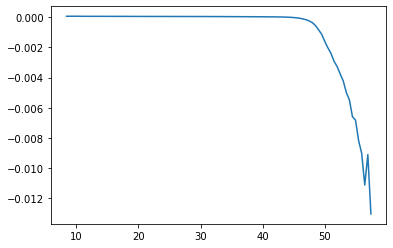

In [41]:
plt.plot(bin_m,E_Pm)

In [42]:
import scipy.integrate as int

In [45]:
Vm = int.cumtrapz(E_Pm,x=bin_m,axis=0)
Vm = np.concatenate((np.zeros((1,1)),Vm),axis=0)

In [46]:
Vm

array([[ 0.00000000e+00],
       [ 3.09840845e-05],
       [ 6.24000084e-05],
       [ 9.36715752e-05],
       [ 1.24619548e-04],
       [ 1.54934060e-04],
       [ 1.84432450e-04],
       [ 2.13344305e-04],
       [ 2.42057242e-04],
       [ 2.70868871e-04],
       [ 2.99694539e-04],
       [ 3.28341731e-04],
       [ 3.56794169e-04],
       [ 3.85154488e-04],
       [ 4.13148222e-04],
       [ 4.40535854e-04],
       [ 4.67565685e-04],
       [ 4.94565820e-04],
       [ 5.21690477e-04],
       [ 5.48790261e-04],
       [ 5.75565129e-04],
       [ 6.01896634e-04],
       [ 6.27860075e-04],
       [ 6.53548718e-04],
       [ 6.78993498e-04],
       [ 7.04257847e-04],
       [ 7.29414116e-04],
       [ 7.54471404e-04],
       [ 7.79434364e-04],
       [ 8.04262549e-04],
       [ 8.28908924e-04],
       [ 8.53392918e-04],
       [ 8.77785444e-04],
       [ 9.02020057e-04],
       [ 9.26076212e-04],
       [ 9.49992850e-04],
       [ 9.73691120e-04],
       [ 9.97267623e-04],
       [ 1.0

In [47]:
Vm.shape

(100, 1)

In [52]:
np.max(field_hist)

82643

In [53]:
np.max(np.abs(Vm))

0.04380121358406886

In [62]:
(field_hist*scale).shape

(100,)

In [63]:
bin_m.shape

(100,)

In [65]:
Vm[:,0].shape

(100,)

In [58]:
scale.size

1

Text(0.5, 0, 'Precipitable Water [kg/m2]')

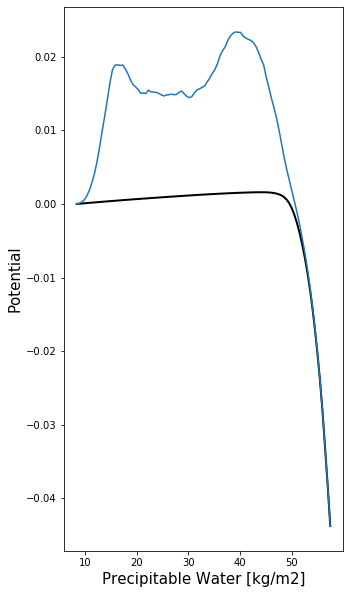

In [70]:
scale = np.max(np.abs(Vm))/np.max(field_hist)

plt.figure(figsize=(5,10))
plt.plot(bin_m,Vm,color='k',linewidth=2)
plt.plot(bin_m,Vm[:,0]+field_hist*scale/2)
plt.ylabel('Potential',fontsize=fz)
plt.xlabel('Precipitable Water [kg/m2]',fontsize=fz)

Text(0.5, 0, 'Precipitable Water [kg/m2]')

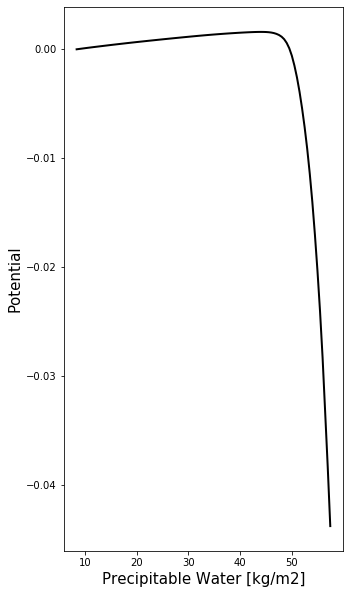

In [71]:
scale = np.max(np.abs(Vm))/np.max(field_hist)

plt.figure(figsize=(5,10))
plt.plot(bin_m,Vm,color='k',linewidth=2)
plt.ylabel('Potential',fontsize=fz)
plt.xlabel('Precipitable Water [kg/m2]',fontsize=fz)